In [1]:
## 这表示直接将matplotlib生成的图嵌入到Notebook中
%matplotlib inline
import random
import torch
from d2l import limutorch as d2l

In [2]:
def synthetic_data(w, b, num_example):
    """生成y = Xw + b + 噪声"""
    X = torch.normal(0, 1, (num_example, len(w)))##生成随机数，随机数的均值为0，方差为1，有num_example行，和w保持同样列数
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape) ## 这里加上的是随机数模拟出来的噪声
    return X, y.reshape((-1,1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w,true_b,1000)
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([ 0.5095, -0.4881]) 
label: tensor([6.8798])


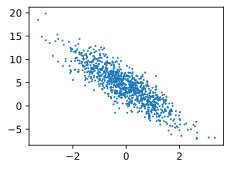

In [3]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(),
                labels.detach().numpy(),1)## numpy是将张量装换成numpy类型

In [4]:
## data_iter函数用于接收批量大小，特征矩阵和标签向量作为输入，生成大小为batch_size的小批量
def data_iter(batch_size, features, labels):
    num_axamples = len(features)
    indices = list(range(num_axamples))##生成下标
    random.shuffle(indices)## 该函数将生成下标进行打乱，random.shuffle会将一个列表中的元素进行打乱，而且不会生成一个新的列表
    for i in range(0, num_axamples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_axamples)]) ## 这里将下标转为张量并不是必需操作
        yield  features[batch_indices], labels[batch_indices] ## yield是python中用于不断返回值的关键字

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.0973,  0.8446],
        [ 0.0793,  2.5756],
        [ 1.9220, -0.2658],
        [-1.4688,  0.1292],
        [-0.1139,  2.0013],
        [-1.4191,  1.5359],
        [-1.3699, -1.3256],
        [-0.3217, -0.7351],
        [-1.3363, -0.4219],
        [ 0.3474, -0.4740]]) 
 tensor([[-0.8566],
        [-4.3966],
        [ 8.9547],
        [ 0.8090],
        [-2.8301],
        [-3.8741],
        [ 5.9646],
        [ 6.0636],
        [ 2.9507],
        [ 6.4987]])


In [5]:
## 定义初始化模型参数
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)## 这里w定义为2*1的格式，应该是为了与X相乘，因为X是1000*2的格式
b = torch.zeros(1, requires_grad=True)
w,b

(tensor([[ 0.0083],
         [-0.0052]], requires_grad=True),
 tensor([0.], requires_grad=True))

In [6]:
## 定义模型
def linreg(X, w, b):
    """线性回归模型"""
    return torch.matmul(X, w) + b## 当输入维数相同时，torch.matmul()表示简单的矩阵乘法，维数不同时会将多出来的维数batch出来，即单独提取出来，剩下的做矩阵乘法

In [7]:
## 定义损失函数
def squared_loss(y_hat, y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape))**2/2

In [8]:
## 定义优化算法
def sgd(params, lr, batch_size):
    with torch.no_grad():## torch.no_grad()表示不进行梯度计算
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [9]:
## 训练过程
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size,features,labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w,b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch{epoch+1},loss{float(train_l.mean()):f}')

epoch1,loss0.029262
epoch2,loss0.000102
epoch3,loss0.000052


In [10]:
print(f'w的估计误差：{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b - b}')

w的估计误差：tensor([ 0.0003, -0.0002], grad_fn=<SubBackward0>)
b的估计误差：tensor([0.0005], grad_fn=<RsubBackward1>)


In [11]:
import numpy as np
import torch
from torch.utils import data

true_w = torch.tensor(([2, -3.4]))
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [12]:
def load_array(data_arrays, batch_size, is_train=True):
    """构造一个Pytorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays) ## 构建张量数据集，列表前加*是将列表元素分别当参数传进去
    return data.DataLoader(dataset, batch_size, shuffle=is_train) ## 每次从数据集中提取batch_size个数据，shuffle决定是否打乱顺序

batch_size = 10
data_iter = load_array((features, labels), batch_size)

next(iter(data_iter))

[tensor([[ 1.1372,  0.8147],
         [-0.3495, -0.7189],
         [-1.4571, -1.5682],
         [-0.0815,  0.8393],
         [-0.1293,  1.0850],
         [ 0.0296, -0.2986],
         [-0.7821, -0.9110],
         [ 1.6269, -1.3003],
         [-0.0836, -0.8059],
         [ 0.7347, -0.4002]]),
 tensor([[ 3.7123],
         [ 5.9356],
         [ 6.6146],
         [ 1.1842],
         [ 0.2588],
         [ 5.2610],
         [ 5.7182],
         [11.8804],
         [ 6.7902],
         [ 7.0350]])]

In [13]:
## 使用框架预定义好的层
"""nn是神经网络的缩写"""
from torch import nn
net = nn.Sequential(nn.Linear(2,1)) ##Sequential相当于是list of layer，Sequential是一个有序容器，神经网络模块将按照传入构造器的顺序依次添加到计算图中执行，同时以神经网络模块为元素的有序字典也可以作为传入参数

In [14]:
## 初始化模型参数
net[0].weight.data.normal_(0, 0.01)## 将神经网络的权重值随机为均值为0，方差为0.01
net[0].bias.data.fill_(0)

tensor([0.])

In [15]:
## 计算均方误差使用的是MSELoss类，也称为平方L2范式
loss = nn.MSELoss()

In [16]:
## 实例化SGD示例
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [17]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step() ## 使用一次step进行一次模型的更新
    l = loss(net(features), labels)
    print(f'epoch{epoch + 1}, loss{l:f}')

epoch1, loss0.000158
epoch2, loss0.000103
epoch3, loss0.000102
